In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!rm -f *.csv
#!curl --output brasil.csv "https://brasil.io/dataset/covid19/caso_full/?format=csv"
!curl --output caso_full.csv.gz "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
!gunzip caso_full.csv.gz
!mv caso_full.csv brasil.csv
#!curl --output pernambuco.csv "https://brasil.io/dataset/covid19/caso/?is_last=True&place_type=city&state=PE&format=csv"
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv


% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0  2703k      0  0:00:02  0:00:02 --:--:-- 2702k
--2020-06-28 22:15:46--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)...151.101.192.133, 151.101.64.133, 151.101.128.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443...conectado.
A requisição HTTP foi enviada, aguardando resposta...200 OK
Tamanho: 30007774 (29M) [text/plain]
Salvando em: “cases-brazil-cities-time.csv”

cases-brazil-cities 100%[===================>]  28,62M  6,85MB/s    em 4,7s    

2020-06-28 22:15:52 (6,12 MB/s) - “cases-brazil-cities-time.csv” salvo [30007774/30007774]

--2020-06-28 22:15:52--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
Resolven

In [4]:
!date
!ls -lh
!mkdir files

dom 28 jun 2020 22:16:01 -03
total 56M
-rw-r--r--. 1 lpgomes lpgomes  26M jun 28 22:15 brasil.csv
-rw-r--r--. 1 lpgomes lpgomes  29M jun 28 22:15 cases-brazil-cities-time.csv
-rw-r--r--. 1 lpgomes lpgomes 282K jun 28 22:15 cases-brazil-states.csv
-rw-r--r--. 1 lpgomes lpgomes 776K jun 28 21:47 covid-19.ipynb
drwxr-xr-x. 2 lpgomes lpgomes 4,0K jun 28 22:00 files
-rw-rw-r--. 1 lpgomes lpgomes  661 jun 28 22:06 README.md
-rw-rw-r--. 1 lpgomes lpgomes  661 jun 28 22:06 README.md.backup


In [5]:
brasil_df = pd.read_csv('brasil.csv')
brasil_df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [6]:
df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
display(df_municipio.tail())

,epi_week,date,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
276477,27,2020-06-28,Brazil,PR,Ângulo/PR,4101150,41015.0,15ª RS Maringá,0,0,0,1,0.00000,34.15301,0.00000,SES
276478,27,2020-06-28,Brazil,BA,Érico Cardoso/BA,2900504,29003.0,Brumado,0,0,0,0,0.00000,0.00000,0.00000,SES
276479,27,2020-06-28,Brazil,PA,Óbidos/PA,1505106,15002.0,Baixo Amazonas,0,5,0,199,9.59012,381.68671,0.02513,SES
276480,27,2020-06-28,Brazil,SP,Óleo/SP,3533809,35094.0,Ourinhos,0,0,0,1,0.00000,40.06410,0.00000,SES
276481,27,2020-06-28,Brazil,TOTAL,TOTAL,0,NaN,NaN,534,57688,27621,1345708,27.45124,640.36470,0.04287,NaN


In [7]:
df_estado = pd.read_csv('cases-brazil-states.csv')
display(df_estado.tail())

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
3033,27,2020-06-28,Brazil,SC,TOTAL,8,312,556,24364,312,24364,4.35463,340.05193,0.01281,18694.0,5850.0,90752.0,1266.63901
3034,27,2020-06-28,Brazil,SE,TOTAL,15,620,1102,24421,620,24421,26.97181,1062.38493,0.02539,8115.0,11886.0,44299.0,1927.13608
3035,27,2020-06-28,Brazil,SP,TOTAL,75,14338,6156,271737,14338,271737,31.22451,591.77402,0.05276,49295.0,257900.0,602384.0,1311.83901
3036,27,2020-06-28,Brazil,TO,TOTAL,0,192,0,10228,192,10228,12.20702,650.27790,0.01877,6103.0,768.0,19882.0,1264.06191
3037,27,2020-06-28,Brazil,TOTAL,TOTAL,534,57688,27621,1345708,57622,1344143,27.45124,640.36470,0.04287,746018.0,709726.0,3157120.0,1502.33795


In [8]:
#Selecionando total de mortes no estado de Pernambuco
df_estado_pernambuco = df_estado[ ['date','state', 'deaths']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE") & (df_estado_pernambuco["deaths"]>0)]
df_estado_pernambuco.tail()

,date,state,deaths
2913,2020-06-24,PE,4425
2941,2020-06-25,PE,4488
2969,2020-06-26,PE,4610
2997,2020-06-27,PE,4708
3025,2020-06-28,PE,4751


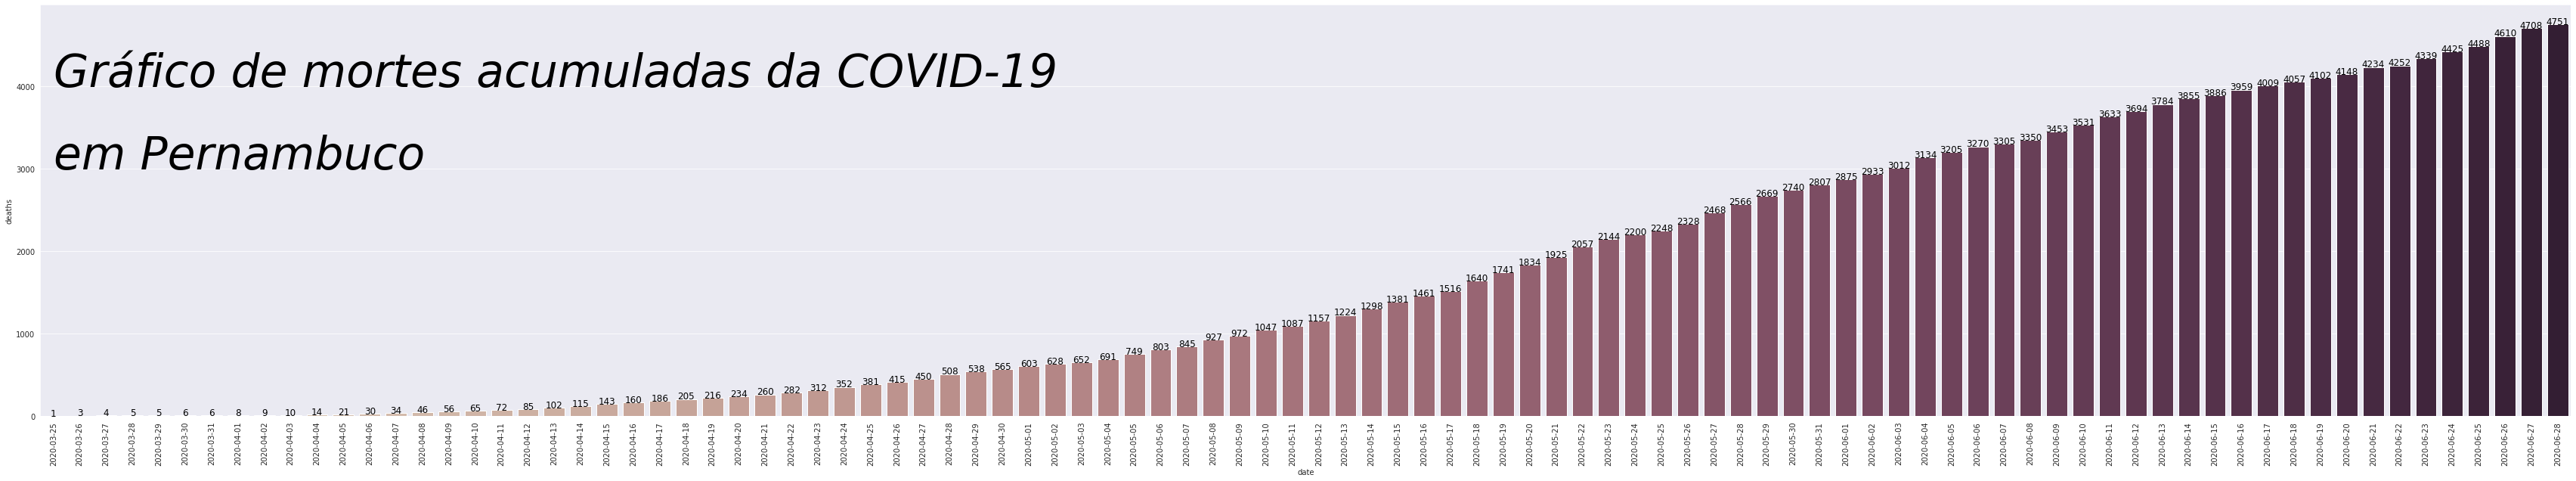

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(60,10))
g = sns.barplot(data=df_estado_pernambuco, x='date',y='deaths',palette="ch:.25")
plt.xticks(rotation=90)
plt.text(0,4000, "Gráfico de mortes acumuladas da COVID-19", fontsize = 60, color='Black', fontstyle='italic')
plt.text(0,3000, "em Pernambuco", fontsize = 60, color='Black', fontstyle='italic')

cont=0
for index, row in df_estado_pernambuco.iterrows():
  g.text(cont,row.deaths, row.deaths, color='black', ha="center",fontsize=12)
  cont = cont+1

g.figure.savefig('files/novos_mortes_pernambuco_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/novos_mortes_pernambuco_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


In [11]:
#Selecionando total de mortes por dia no estado de Pernambuco
df_estado_pernambuco = df_estado[ ['date','state', 'newDeaths']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE") & (df_estado_pernambuco["newDeaths"]>0)]
df_estado_pernambuco.tail()

,date,state,newDeaths
2913,2020-06-24,PE,86
2941,2020-06-25,PE,63
2969,2020-06-26,PE,122
2997,2020-06-27,PE,98
3025,2020-06-28,PE,43


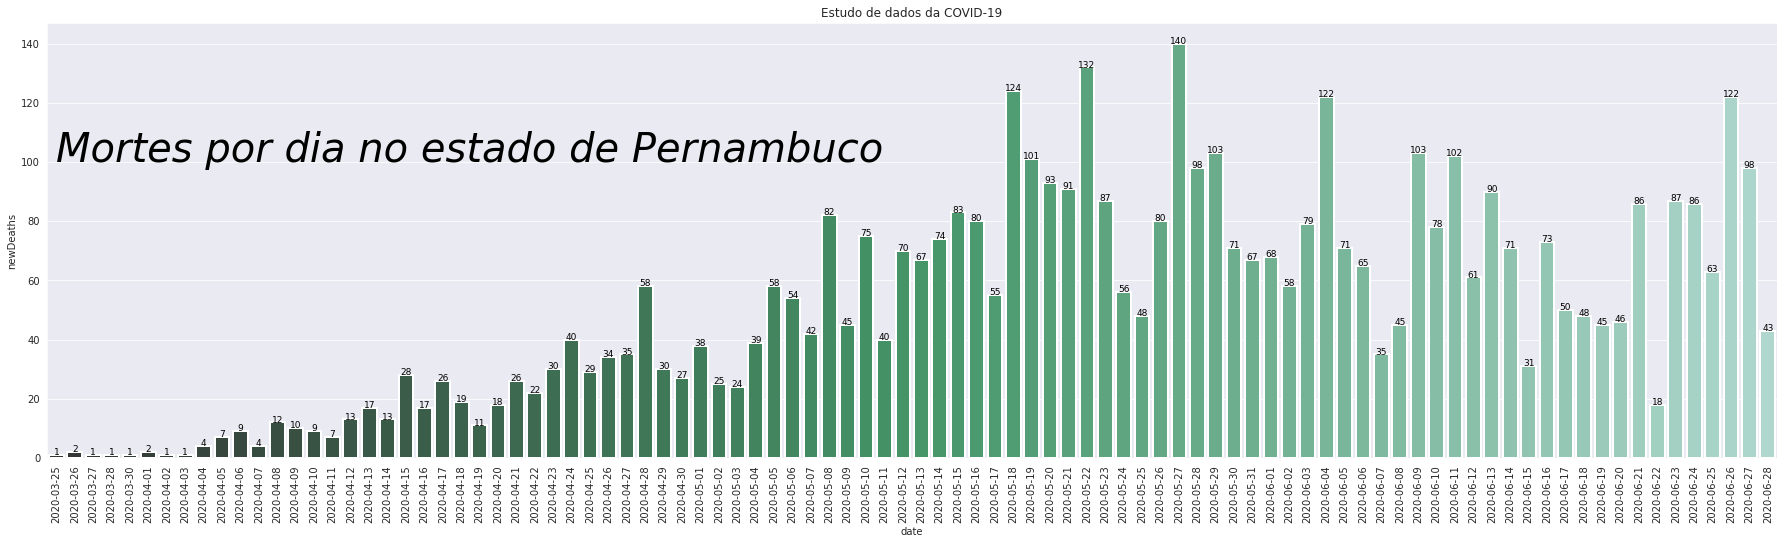

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_estado_pernambuco, x='date',y='newDeaths',palette="BuGn_d",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,100, "Mortes por dia no estado de Pernambuco", fontsize = 40, color='Black', fontstyle='italic')

cont=0
for index, row in df_estado_pernambuco.iterrows():
  g.text(cont,row.newDeaths, row.newDeaths, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_mortes_pernambuco_por_dia.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/novos_mortes_pernambuco_por_dia.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


Text(0.5, 1.0, 'Mortes por dia no estado de Pernambuco')

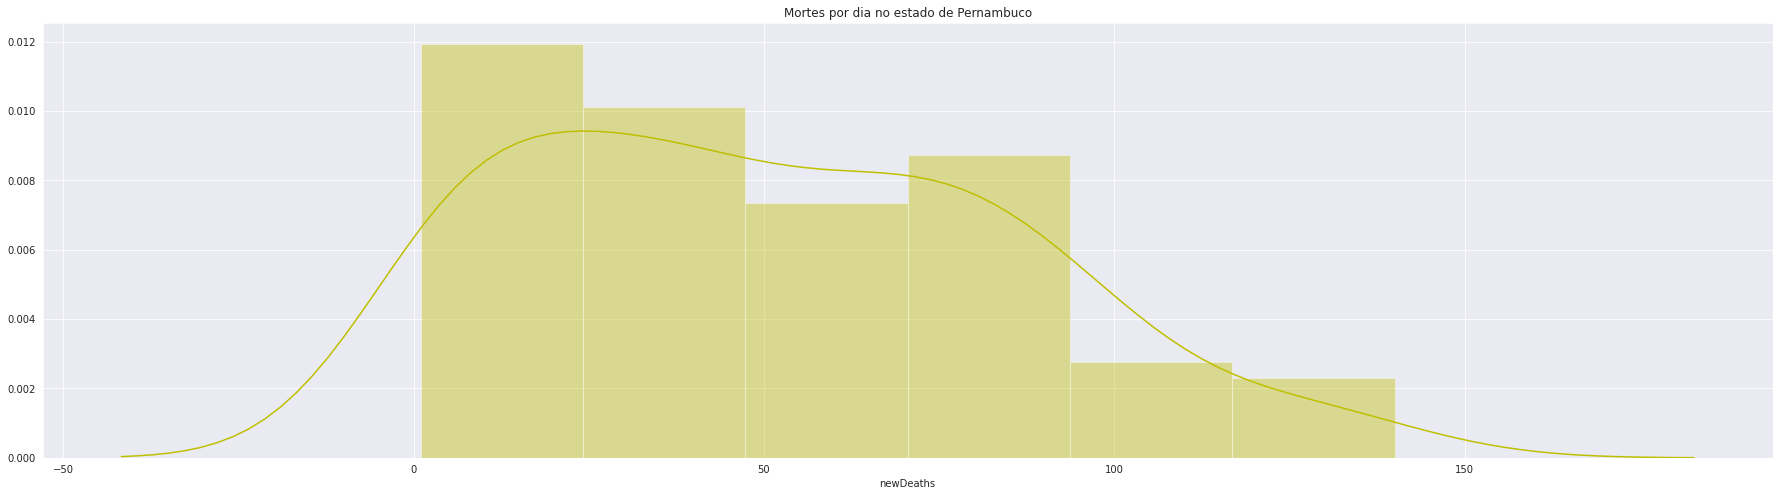

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
sns.distplot(df_estado_pernambuco['newDeaths'],color="y")
plt.title('Mortes por dia no estado de Pernambuco') 

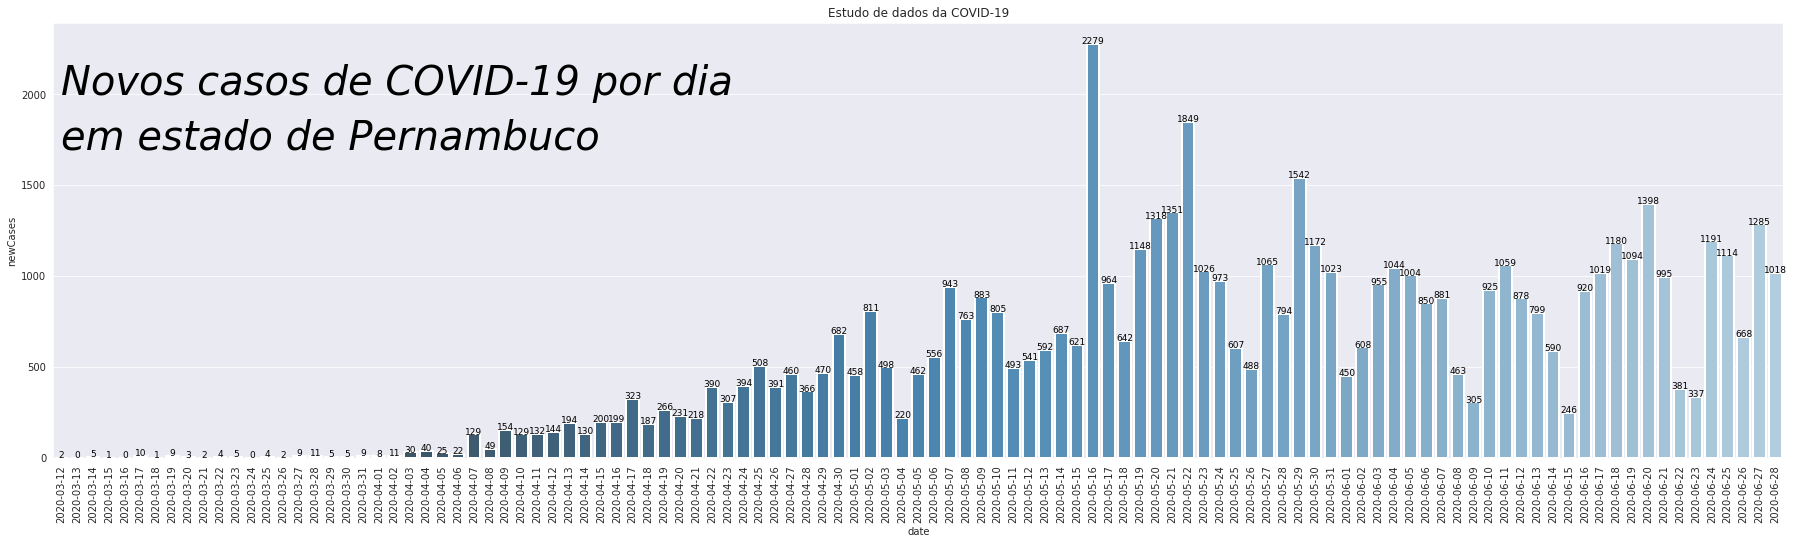

In [15]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_estado_pernambuco, x='date',y='newCases',palette="Blues_d",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,2000, "Novos casos de COVID-19 por dia", fontsize = 40, color='Black', fontstyle='italic')
plt.text(0,1700, "em estado de Pernambuco", fontsize = 40, color='Black', fontstyle='italic')

cont=0
for index, row in df_estado_pernambuco.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_pernambuco_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/novos_casos_pernambuco_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,date,state,city,newCases
254386,2020-06-24,PE,Paulista/PE,19
259419,2020-06-25,PE,Paulista/PE,21
264483,2020-06-26,PE,Paulista/PE,23
269588,2020-06-27,PE,Paulista/PE,30
274715,2020-06-28,PE,Paulista/PE,0


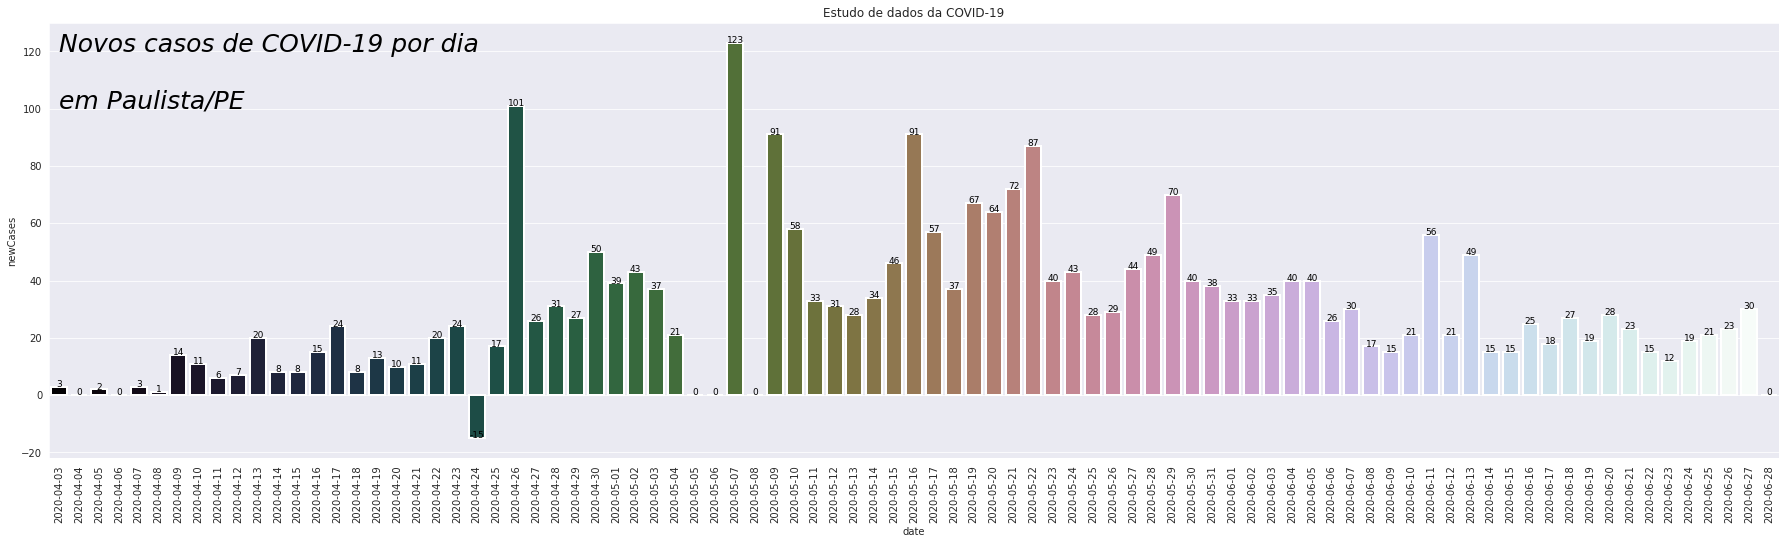

In [ ]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado
df_paulista = df_paulista.loc[(df_paulista["state"]=="PE")]
# Selecionando municipio de Paulista
df_paulista = df_paulista.loc[(df_paulista["city"]=="Paulista/PE")]


display(df_paulista.tail())

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_paulista, x='date',y='newCases',palette="cubehelix",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,120, "Novos casos de COVID-19 por dia", fontsize = 25, color='Black', fontstyle='italic')
plt.text(0,100, "em Paulista/PE", fontsize = 25, color='Black', fontstyle='italic')

cont=0
for index, row in df_paulista.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_paulista_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/novos_casos_paulista_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,date,state,city,newCases
254788,2020-06-24,PE,Recife/PE,257
259821,2020-06-25,PE,Recife/PE,190
264886,2020-06-26,PE,Recife/PE,110
269992,2020-06-27,PE,Recife/PE,166
275119,2020-06-28,PE,Recife/PE,0


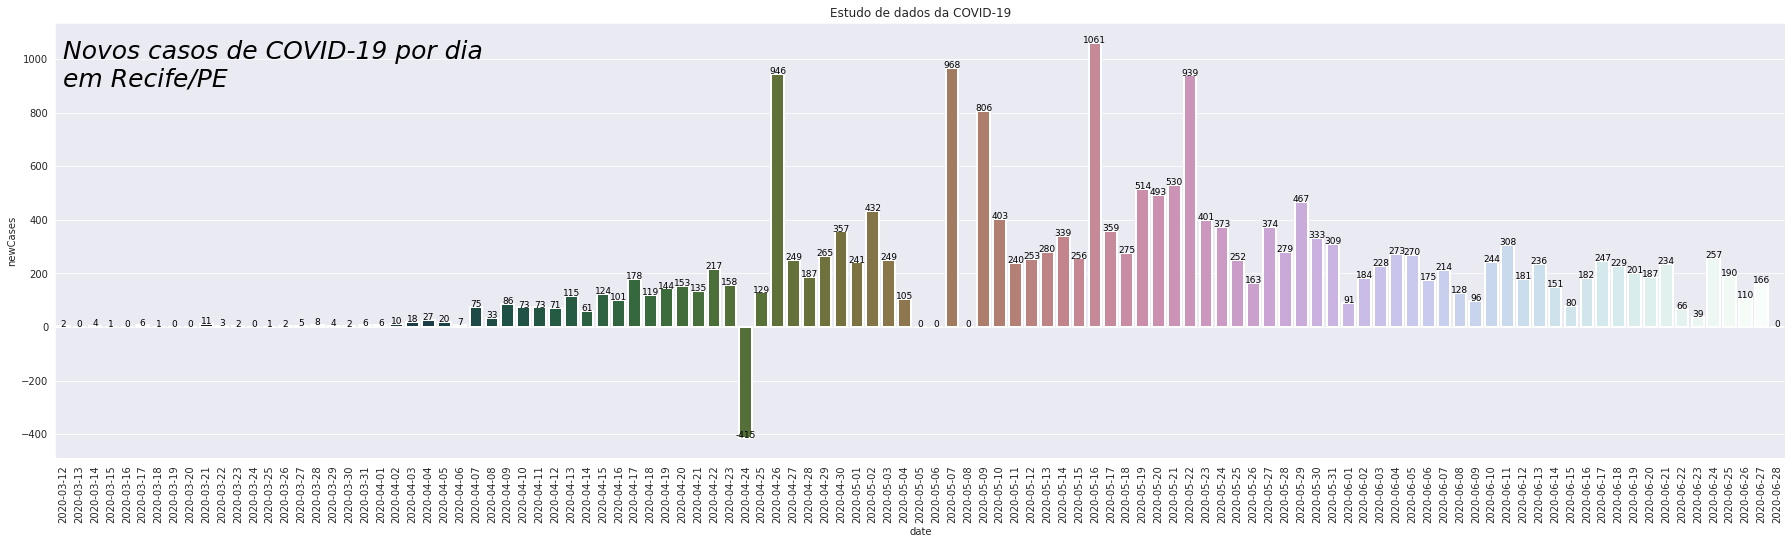

In [16]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado
df_paulista = df_paulista.loc[(df_paulista["state"]=="PE")]
# Selecionando municipio de Recife
df_paulista = df_paulista.loc[(df_paulista["city"]=="Recife/PE")]


display(df_paulista.tail())

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_paulista, x='date',y='newCases',palette="cubehelix",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,1000, "Novos casos de COVID-19 por dia", fontsize = 25, color='Black', fontstyle='italic')
plt.text(0,900, "em Recife/PE", fontsize = 25, color='Black', fontstyle='italic')

cont=0
for index, row in df_paulista.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_recife_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/novos_casos_recife_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,date,state,city,newCases
254186,2020-06-24,PE,Olinda/PE,70
259218,2020-06-25,PE,Olinda/PE,22
264279,2020-06-26,PE,Olinda/PE,28
269383,2020-06-27,PE,Olinda/PE,93
274510,2020-06-28,PE,Olinda/PE,0


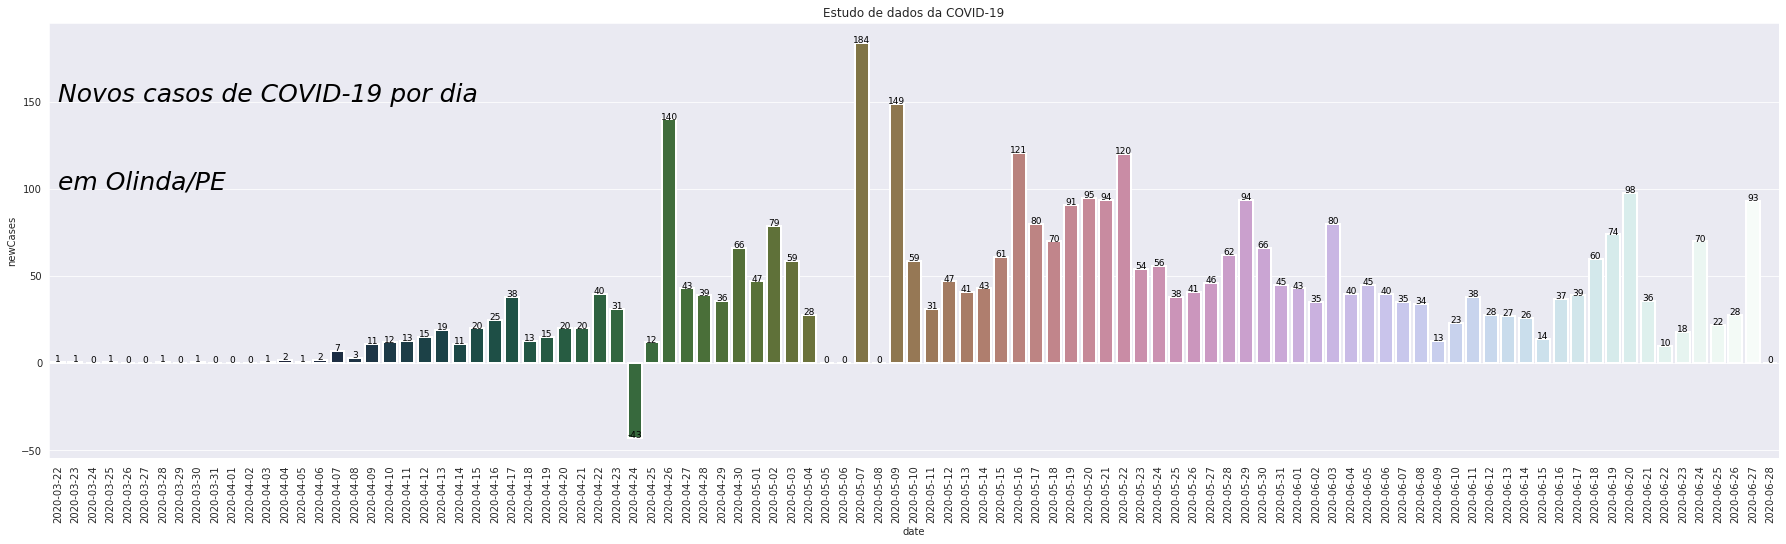

In [ ]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado
df_paulista = df_paulista.loc[(df_paulista["state"]=="PE")]
# Selecionando municipio de Olinda
df_paulista = df_paulista.loc[(df_paulista["city"]=="Olinda/PE")]


display(df_paulista.tail())

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_paulista, x='date',y='newCases',palette="cubehelix",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,150, "Novos casos de COVID-19 por dia", fontsize = 25, color='Black', fontstyle='italic')
plt.text(0,100, "em Olinda/PE", fontsize = 25, color='Black', fontstyle='italic')

cont=0
for index, row in df_paulista.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_olinda_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/novos_casos_olinda_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


2242
87


,month,deaths,cases
0,Mar,6,87
1,Apr,559,6789
2,May,2242,27574
3,Jun,1944,23657


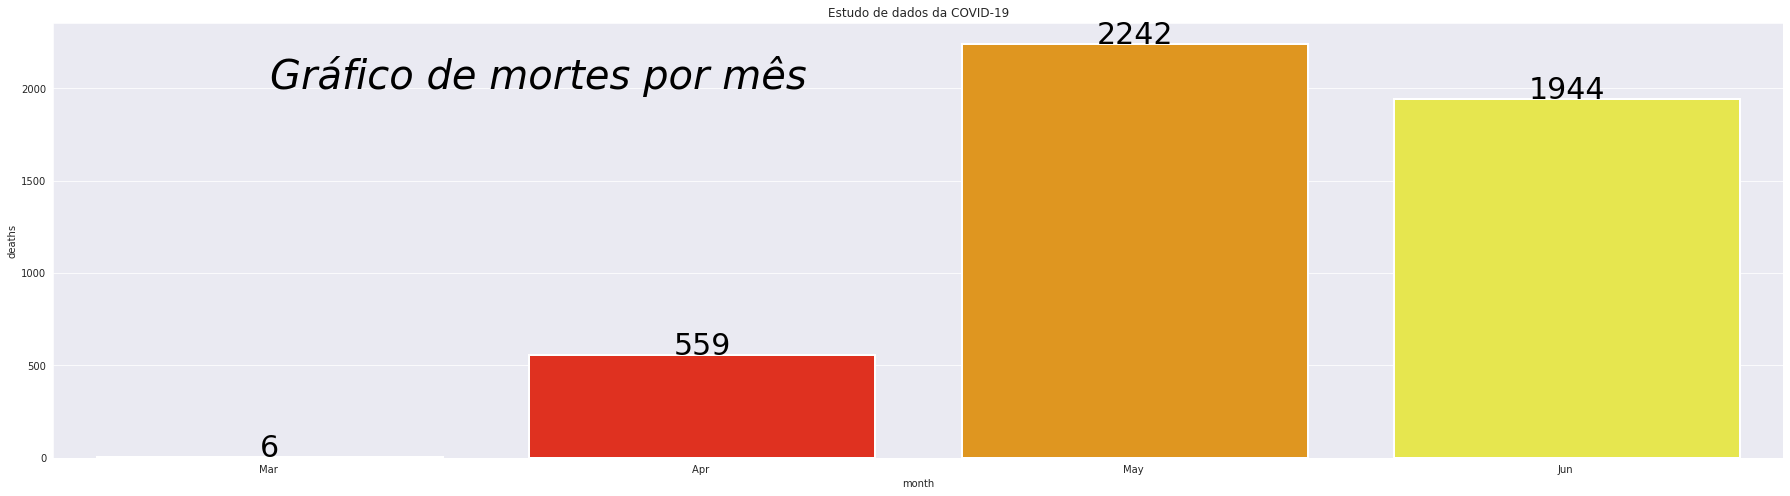

In [18]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
#df_estado_pernambuco = df_estado[ ['date','state', 'deaths']]
#df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
#df_estado_pernambuco.tail()

# Carregando dataframe
df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
#display(df_municipio.tail())

# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newDeaths']]
# Selecionando estado e datas
df_paulista_deaths_03 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-03-01") & (df_paulista["date"] <= "2020-03-31") ]
df_paulista_deaths_04 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-04-01") & (df_paulista["date"] <= "2020-04-31") ]
df_paulista_deaths_05 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-05-01") & (df_paulista["date"] <= "2020-05-31") ]
df_paulista_deaths_06 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-06-01") & (df_paulista["date"] <= "2020-06-31") ]

# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado e datas
df_paulista_totalCases_03 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-03-01") & (df_paulista["date"] <= "2020-03-31") ]
df_paulista_totalCases_04 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-04-01") & (df_paulista["date"] <= "2020-04-31") ]
df_paulista_totalCases_05 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-05-01") & (df_paulista["date"] <= "2020-05-31") ]
df_paulista_totalCases_06 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-06-01") & (df_paulista["date"] <= "2020-06-31") ]

# Número de mortes por mês
sum_row = df_paulista_deaths_05.sum(axis=0)
print(sum_row.newDeaths)

# Número de casos por mês
sum_row = df_paulista_totalCases_03.sum(axis=0)
print(sum_row.newCases)


data = {'month': ['Mar ','Apr ','May ','Jun '],
        'deaths': [
                   df_paulista_deaths_03.sum(axis=0).newDeaths,
                   df_paulista_deaths_04.sum(axis=0).newDeaths,
                   df_paulista_deaths_05.sum(axis=0).newDeaths,
                   df_paulista_deaths_06.sum(axis=0).newDeaths,
                   ],
        'cases': [
                  df_paulista_totalCases_03.sum(axis=0).newCases,
                  df_paulista_totalCases_04.sum(axis=0).newCases,
                  df_paulista_totalCases_05.sum(axis=0).newCases,
                  df_paulista_totalCases_06.sum(axis=0).newCases,
                  ]
        }

df = pd.DataFrame(data)
display(df)

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(x="month", y="deaths", data=df,palette="hot",linewidth=2);
plt.title('Estudo de dados da COVID-19') 
plt.text(0,2000, "Gráfico de mortes por mês", fontsize = 40, color='Black', fontstyle='italic')
plt.text(0,1800, "no estado de Pernumbuco", fontsize = 40, color='Black', fontstyle='italic')


cont=0
for index, row in df.iterrows():
  g.text(cont,row.deaths, row.deaths, color='black', ha="center",fontsize=30)
  cont = cont+1

g.figure.savefig('files/mortes_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/mortes_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,month,deaths,cases
0,Mar,6,87
1,Apr,559,6789
2,May,2242,27574
3,Jun,1944,23657


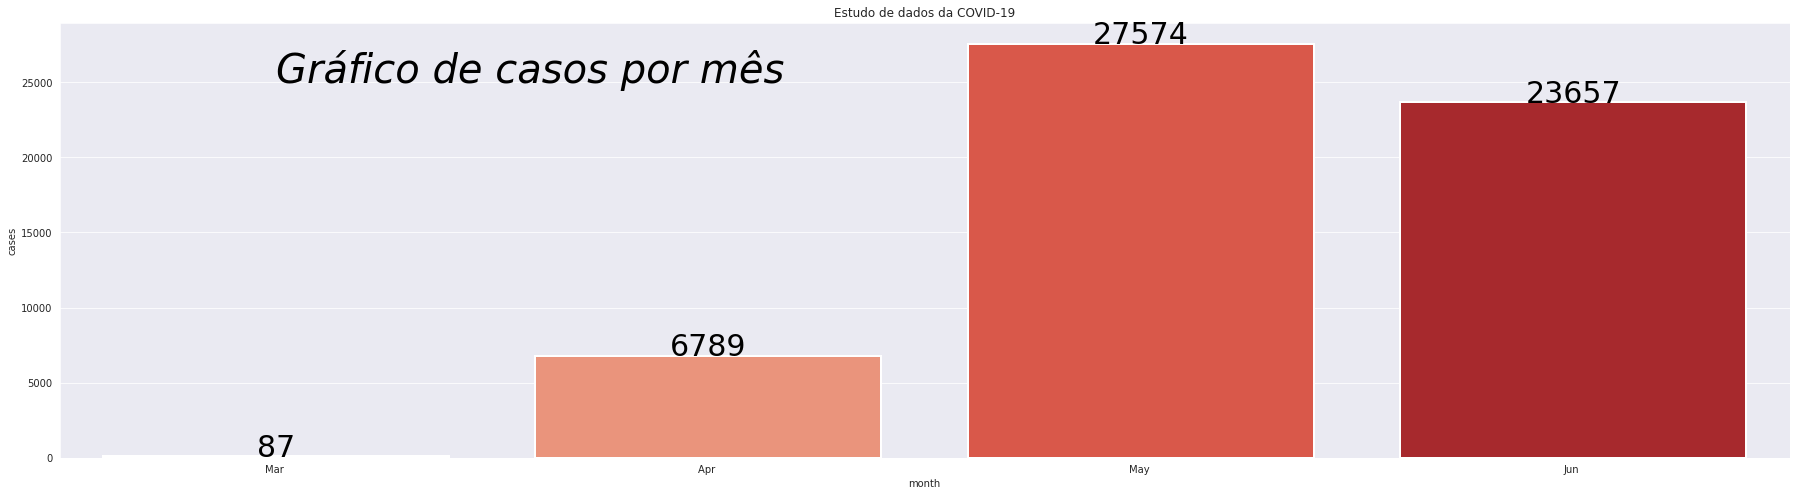

In [19]:
df = pd.DataFrame(data)
display(df)

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(x="month", y="cases", data=df,palette="Reds",linewidth=2);
plt.title('Estudo de dados da COVID-19') 
plt.text(0,25000, "Gráfico de casos por mês", fontsize = 40, color='Black', fontstyle='italic')
plt.text(0,23000, "no estado de Pernumbuco", fontsize = 40, color='Black', fontstyle='italic')

cont=0
for index, row in df.iterrows():
  g.text(cont,row.cases, row.cases, color='black', ha="center",fontsize=30)
  cont = cont+1

g.figure.savefig('files/casos_por_mes.png',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
g.figure.savefig('files/casos_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)
